In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.datasets import fetch_mldata
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Scikit-learn経由でMNISTのオリジナルデータをダウロード
mnist = fetch_mldata('MNIST original')

# 説明変数と目的変数に切り分けます
X, y = mnist['data'], mnist['target']

/home/shuto/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/shuto/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
# Xの53238番目のデータをtest_numberへ切り出す
test_number = X[53238]
# reshape関数を使って784を28x28へ変換する
test_number_image = test_number.reshape(28, 28)
# pandasのカラム表示の設定を変更
pd.options.display.max_columns = 28
# Numpy配列からPandasのデータフレームへ変換
number_matrix = pd.DataFrame(test_number_image)
# number_matrixの表示
number_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,70,70,112,229,229,161,161,161,162,65,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,22,230,254,253,253,253,254,253,253,253,254,249,222,105,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,24,253,254,253,242,137,138,188,196,246,254,253,253,253,119,0,0,0,0,0,0,0
8,0,0,0,0,0,0,24,253,254,219,63,0,0,0,0,50,120,253,253,253,184,0,0,0,0,0,0,0
9,0,0,0,0,0,0,9,185,255,254,144,69,0,0,0,0,95,254,254,254,102,0,0,0,0,0,0,0


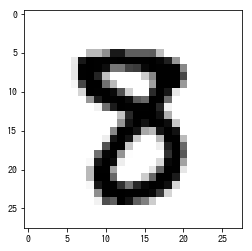

In [13]:
# imshowを使って表示test_number_image（Numpy配列）を画像で表示
plt.imshow(test_number_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.show()

# CNN

In [39]:
# 訓練データとテストデータを切り分ける
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_test_backup = y_test

# 28x28x1のサイズへ変換しましょう
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# データタイプをfloat32へ変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 正規化（ピクセルの最大値は255）
X_train /= 255
X_test /= 255

# ターゲットとなるyを変換
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [40]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [41]:
BATCH = 64
EPOCH = 10
model.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 576us/step - loss: 0.1846 - acc: 0.9452 - val_loss: 0.0722 - val_acc: 0.9772
Epoch 2/10
60000/60000 [==============================] - 34s 567us/step - loss: 0.0715 - acc: 0.9778 - val_loss: 0.0466 - val_acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 34s 569us/step - loss: 0.0527 - acc: 0.9830 - val_loss: 0.0438 - val_acc: 0.9852
Epoch 4/10
60000/60000 [==============================] - 37s 612us/step - loss: 0.0386 - acc: 0.9877 - val_loss: 0.0480 - val_acc: 0.9834
Epoch 5/10
60000/60000 [==============================] - 34s 565us/step - loss: 0.0312 - acc: 0.9898 - val_loss: 0.0371 - val_acc: 0.9872
Epoch 6/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.0265 - acc: 0.9916 - val_loss: 0.0408 - val_acc: 0.9870
Epoch 7/10
60000/60000 [==============================] - 35s 582us/step - loss: 0.0204 - acc: 0.9937 - val_loss: 0.

In [24]:
# テストデータを使ってモデルの評価（上と同じになるはず）
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=BATCH)
print(loss_and_metrics)

10000/10000 [==============================] - 5s 456us/step
[0.0401529030560902, 0.9864]


# DNN

In [35]:
# 訓練データとテストデータを切り分ける
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_test_backup = y_test

# データタイプをfloat32へ変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 正規化（ピクセルの最大値は255）
X_train /= 255
X_test /= 255

# ターゲットとなるyを変換
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [36]:
model = Sequential([
    Dense(1300, input_dim=784, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [38]:
from keras.callbacks import EarlyStopping

EPOCH = 10
es = EarlyStopping(monitor='val_acc', patience=4)
model.fit(X_train, y_train, batch_size=BATCH, epochs=EPOCH,
          validation_data=(X_test, y_test), callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.2308 - acc: 0.9312 - val_loss: 0.1134 - val_acc: 0.9639
Epoch 2/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.1072 - acc: 0.9673 - val_loss: 0.0768 - val_acc: 0.9767
Epoch 3/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0770 - acc: 0.9757 - val_loss: 0.0648 - val_acc: 0.9797
Epoch 4/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0629 - acc: 0.9799 - val_loss: 0.0617 - val_acc: 0.9806
Epoch 5/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0540 - acc: 0.9822 - val_loss: 0.0695 - val_acc: 0.9783
Epoch 6/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0452 - acc: 0.9852 - val_loss: 0.0619 - val_acc: 0.9811
Epoch 7/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0380 - acc: 0.9868 - val_loss: 0.